In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

import cv2
import random
from tqdm import tqdm
import matplotlib.pyplot as plt

In [2]:
transform = transforms.Compose([
    transforms.ToTensor(),
    lambda x: -1*x
])

train_data = datasets.MNIST(root="./data", train=True, transform=transform, download=True)
train_loader = DataLoader(train_data, batch_size=128, shuffle=True)

469it [00:03, 120.68it/s]


Epoch 1, Loss: 824.35
Accuracy: 93.50%



469it [00:03, 119.98it/s]


Epoch 2, Loss: 719.79
Accuracy: 95.34%



469it [00:04, 109.61it/s]


Epoch 3, Loss: 711.76
Accuracy: 95.92%



469it [00:03, 118.35it/s]


Epoch 4, Loss: 708.34
Accuracy: 96.23%



469it [00:03, 120.75it/s]


Epoch 5, Loss: 706.36
Accuracy: 96.40%



469it [00:03, 119.66it/s]


Epoch 6, Loss: 705.05
Accuracy: 96.49%



469it [00:04, 116.36it/s]


Epoch 7, Loss: 704.02
Accuracy: 96.50%



469it [00:03, 121.23it/s]


Epoch 8, Loss: 703.14
Accuracy: 96.77%



469it [00:03, 121.59it/s]


Epoch 9, Loss: 702.55
Accuracy: 96.73%



469it [00:03, 120.67it/s]


Epoch 10, Loss: 702.09
Accuracy: 96.83%



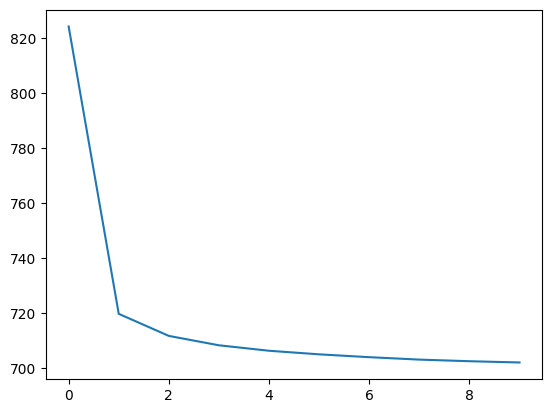

In [3]:
class TinyCNN(nn.Module):
    def __init__(self):
        super(TinyCNN, self).__init__()
        # 28x28x1 -> 24x24x1 -> 12x12x2 -> 10x10x4 -> 5x5x4 -> 100 -> 10
        self.conv1 = nn.Conv2d(1, 2, 5)
        self.conv2 = nn.Conv2d(2, 4, 3)
        self.fc = nn.Linear(100, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = torch.relu(x)
        x = torch.max_pool2d(x, 2)

        x = self.conv2(x)
        x = torch.sigmoid(x)
        x = torch.max_pool2d(x, 2)

        x = x.view(-1, 100)
        x = self.fc(x)
        x = torch.softmax(x, dim=1)

        return x
        
model = TinyCNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.007)

test_data = datasets.MNIST(root="./data", train=False, transform=transform, download=True)
test_loader = DataLoader(test_data, batch_size=128, shuffle=True)

losses = []
for epoch in range(10):
    epoch_loss = 0
    for i, (X, y) in tqdm(enumerate(train_loader)):
        optimizer.zero_grad()
        y_pred = model(X)
        loss = criterion(y_pred, y)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()

    print(f"Epoch {epoch+1}, Loss: {epoch_loss:.2f}")
    losses.append(epoch_loss)

    # test set accuracy
    correct = 0
    total = 0
    with torch.no_grad():
        for X, y in test_loader:
            y_pred = model(X)
            _, predicted = torch.max(y_pred.data, 1)
            total += y.size(0)
            correct += (predicted == y).sum().item()
    print(f"Accuracy: {correct/total *100:.2f}%\n")

plt.plot(losses)
plt.show()

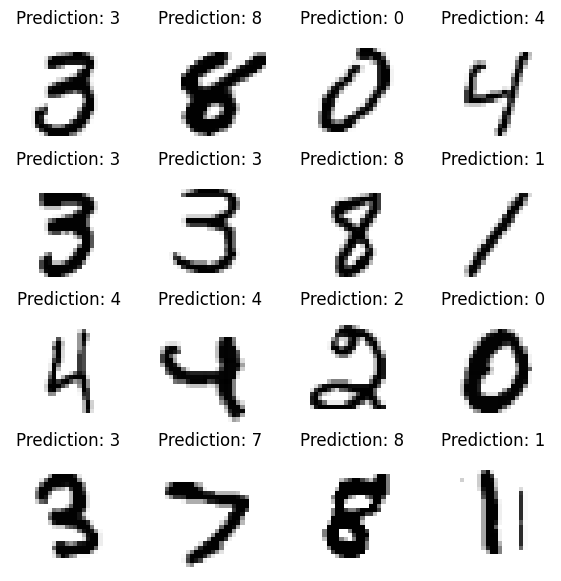

In [4]:
plt.figure(figsize=(7, 7))
for i in range(16):
    idx = random.randint(0, len(test_data))

    X = test_data[idx][0].unsqueeze(0)
    y = test_data[idx][1]

    y_pred = model(X)

    plt.subplot(4, 4, i+1)

    plt.imshow(X.squeeze().numpy(), cmap="gray")
    plt.title(f"Prediction: {y_pred.argmax(1).item()}")
    plt.axis("off")
plt.show()

# Visualization

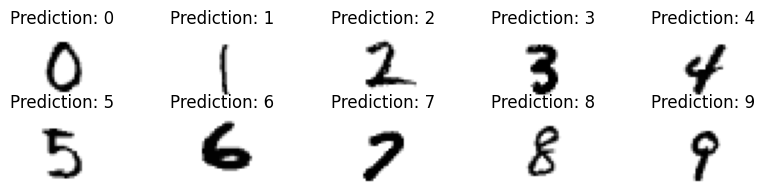

In [5]:
inputs = {}
while True:
    i = random.randint(0, len(test_data))
    y = test_data[i][1]
    if y not in inputs.keys():
        inputs[y] = test_data[i][0].unsqueeze(0)

    if len(inputs.keys()) == 10:
        break
        
plt.figure(figsize=(10, 2))
for i in range(10):
    X = inputs[i]
    y_pred = model(X)
    plt.subplot(2, 5, i+1)
    plt.imshow(X.squeeze().numpy(), cmap="gray")
    plt.title(f"Prediction: {y_pred.argmax(1).item()}")
    plt.axis("off")


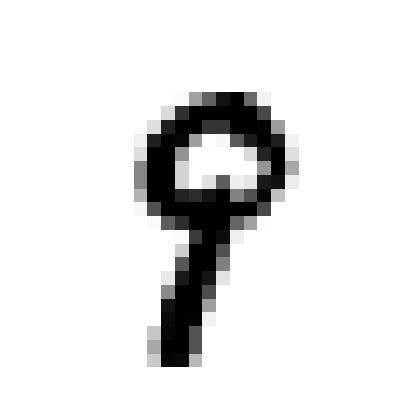

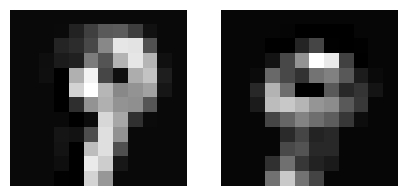

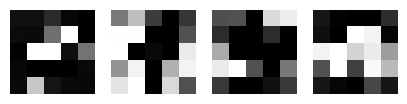

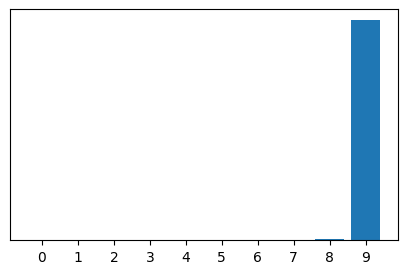

In [15]:
inp = inputs[9]

layer_1 = model.conv1(inp)
layer_1 = torch.relu(layer_1)
layer_1 = torch.max_pool2d(layer_1, 2)

layer_2 = model.conv2(layer_1)
layer_2 = torch.sigmoid(layer_2)
layer_2 = torch.max_pool2d(layer_2, 2)

layer_3 = layer_2.view(-1, 100)
layer_3 = model.fc(layer_3)
layer_3 = torch.softmax(layer_3, dim=1)

plt.figure(figsize=(5,5))
plt.imshow(inp.squeeze().numpy(), cmap="gray")
plt.axis("off")

plt.figure(figsize=(5, 3))
for i in range(2):
    plt.subplot(1, 2, i+1)
    plt.imshow(layer_1.squeeze()[i].detach().numpy(), cmap="gray")
    plt.axis("off")

plt.figure(figsize=(5, 3))
for i in range(4):
    plt.subplot(1, 4, i+1)
    plt.imshow(layer_2.squeeze()[i].detach().numpy(), cmap="gray")
    plt.axis("off")

plt.figure(figsize=(5, 3))
plt.bar(range(10), layer_3.squeeze().detach().numpy())
plt.xticks(range(10))
plt.yticks([])

plt.show()